In [92]:
import itertools
import pandas as pd
import numpy as np
import re
import os
from tqdm import tqdm


import matplotlib.pyplot as plt

 
from keras.models import  Model
from keras.layers import Dense
from tensorflow.keras.layers import Input
from scipy import sparse

In [17]:
!pip install pandas==0.25.3
!pip install numpy==1.17.3
!pip install Keras==2.3.1
!pip install tensorflow==2.0.0
!pip install tqdm==4.43.0
!pip install matplotlib==3.1.3

  error: subprocess-exited-with-error
  
  python setup.py egg_info did not run successfully.
  exit code: 1
  
  [328 lines of output]
  C:\Users\ASUS ZenBook\AppData\Local\Temp\pip-install-t1z_8yix\pandas_a1a5590efdf24be1aafc5457f1f6c750\setup.py:12: DeprecationWarning: pkg_resources is deprecated as an API. See https://setuptools.pypa.io/en/latest/pkg_resources.html
    import pkg_resources
  C:\Users\ASUS ZenBook\AppData\Local\Temp\pip-install-t1z_8yix\pandas_a1a5590efdf24be1aafc5457f1f6c750\setup.py:54: DeprecationWarning: distutils Version classes are deprecated. Use packaging.version instead.
    _CYTHON_INSTALLED = ver >= LooseVersion(min_cython_ver)
  performance hint: pandas\_libs\hashing.pyx:97:5: Exception check on 'u32to8_le' will always require the GIL to be acquired.
  Possible solutions:
          1. Declare the function as 'noexcept' if you control the definition and you're sure you don't want the function to raise exceptions.
          2. Use an 'int' return type on t


     ---------------------------------------- 0.0/12.6 MB ? eta -:--:--
     ---------------------------------------- 0.0/12.6 MB ? eta -:--:--
     ---------------------------------------- 0.0/12.6 MB ? eta -:--:--
     ---------------------------------------- 0.0/12.6 MB ? eta -:--:--
     --------------------------------------- 0.0/12.6 MB 262.6 kB/s eta 0:00:48
     --------------------------------------- 0.1/12.6 MB 326.1 kB/s eta 0:00:39
     --------------------------------------- 0.1/12.6 MB 504.4 kB/s eta 0:00:25
      -------------------------------------- 0.2/12.6 MB 784.3 kB/s eta 0:00:16
      -------------------------------------- 0.2/12.6 MB 835.2 kB/s eta 0:00:15
     - -------------------------------------- 0.4/12.6 MB 1.2 MB/s eta 0:00:11
     - -------------------------------------- 0.5/12.6 MB 1.5 MB/s eta 0:00:09
     - -------------------------------------- 0.6/12.6 MB 1.4 MB/s eta 0:00:09
     -- ------------------------------------- 0.7/12.6 MB 1.6 MB/s eta 0:0

  error: subprocess-exited-with-error
  
  python setup.py bdist_wheel did not run successfully.
  exit code: 1
  
  [2007 lines of output]
  Running from numpy source directory.
  blas_opt_info:
  blas_mkl_info:
  No module named 'numpy.distutils._msvccompiler' in numpy.distutils; trying from distutils
  customize MSVCCompiler
    libraries mkl_rt not found in ['C:\\Users\\ASUS ZenBook\\anaconda3\\lib', 'C:\\', 'C:\\Users\\ASUS ZenBook\\anaconda3\\libs']
    NOT AVAILABLE
  
  blis_info:
  No module named 'numpy.distutils._msvccompiler' in numpy.distutils; trying from distutils
  customize MSVCCompiler
    libraries blis not found in ['C:\\Users\\ASUS ZenBook\\anaconda3\\lib', 'C:\\', 'C:\\Users\\ASUS ZenBook\\anaconda3\\libs']
    NOT AVAILABLE
  
  openblas_info:
  No module named 'numpy.distutils._msvccompiler' in numpy.distutils; trying from distutils
  customize MSVCCompiler
  No module named 'numpy.distutils._msvccompiler' in numpy.distutils; trying from distutils
  customize MS

     ---------------------------------------- 0.0/377.8 kB ? eta -:--:--
     - -------------------------------------- 10.2/377.8 kB ? eta -:--:--
     - -------------------------------------- 10.2/377.8 kB ? eta -:--:--
     - -------------------------------------- 10.2/377.8 kB ? eta -:--:--
     --- --------------------------------- 30.7/377.8 kB 146.3 kB/s eta 0:00:03
     --- --------------------------------- 30.7/377.8 kB 146.3 kB/s eta 0:00:03
     ------ ------------------------------ 61.4/377.8 kB 234.9 kB/s eta 0:00:02
     ---------- ------------------------- 112.6/377.8 kB 386.4 kB/s eta 0:00:01
     ------------- ---------------------- 143.4/377.8 kB 449.7 kB/s eta 0:00:01
     -------------------------- --------- 276.5/377.8 kB 776.2 kB/s eta 0:00:01
     ------------------------------------ 377.8/377.8 kB 942.5 kB/s eta 0:00:00
     ---------------------------------------- 0.0/50.7 kB ? eta -:--:--
     ---------------------------------------- 50.7/50.7 kB ? eta 0:00:00


ERROR: pip's dependency resolver does not currently take into account all the packages that are installed. This behaviour is the source of the following dependency conflicts.
tensorflow-intel 2.15.0 requires keras<2.16,>=2.15.0, but you have keras 2.3.1 which is incompatible.

[notice] A new release of pip is available: 23.3.2 -> 24.0
[notice] To update, run: python.exe -m pip install --upgrade pip
ERROR: Could not find a version that satisfies the requirement tensorflow==2.0.0 (from versions: 2.12.0rc0, 2.12.0rc1, 2.12.0, 2.12.1, 2.13.0rc0, 2.13.0rc1, 2.13.0rc2, 2.13.0, 2.13.1, 2.14.0rc0, 2.14.0rc1, 2.14.0, 2.14.1, 2.15.0rc0, 2.15.0rc1, 2.15.0)
ERROR: No matching distribution found for tensorflow==2.0.0

[notice] A new release of pip is available: 23.3.2 -> 24.0
[notice] To update, run: python.exe -m pip install --upgrade pip


     ---------------------------------------- 0.0/59.1 kB ? eta -:--:--
     ------ --------------------------------- 10.2/59.1 kB ? eta -:--:--
     ------------- ------------------------ 20.5/59.1 kB 165.2 kB/s eta 0:00:01
     ------------- ------------------------ 20.5/59.1 kB 165.2 kB/s eta 0:00:01
     ------------------- ------------------ 30.7/59.1 kB 163.8 kB/s eta 0:00:01
     -------------------------------- ----- 51.2/59.1 kB 219.0 kB/s eta 0:00:01
     -------------------------------------- 59.1/59.1 kB 240.8 kB/s eta 0:00:00
  Attempting uninstall: tqdm
    Found existing installation: tqdm 4.65.0
    Uninstalling tqdm-4.65.0:
      Successfully uninstalled tqdm-4.65.0


ERROR: pip's dependency resolver does not currently take into account all the packages that are installed. This behaviour is the source of the following dependency conflicts.
pandas-profiling 3.2.0 requires tqdm>=4.48.2, but you have tqdm 4.43.0 which is incompatible.
pandas-profiling 3.2.0 requires visions[type_image_path]==0.7.4, but you have visions 0.7.5 which is incompatible.
panel 0.14.4 requires tqdm>=4.48.0, but you have tqdm 4.43.0 which is incompatible.
ultralytics 8.1.10 requires tqdm>=4.64.0, but you have tqdm 4.43.0 which is incompatible.
ydata-profiling 4.6.0 requires tqdm<5,>=4.48.2, but you have tqdm 4.43.0 which is incompatible.
anaconda-client 1.12.1 requires tqdm>=4.56.0, but you have tqdm 4.43.0 which is incompatible.
datasets 2.12.0 requires tqdm>=4.62.1, but you have tqdm 4.43.0 which is incompatible.

[notice] A new release of pip is available: 23.3.2 -> 24.0
[notice] To update, run: python.exe -m pip install --upgrade pip


     ---------------------------------------- 0.0/40.9 MB ? eta -:--:--
     ---------------------------------------- 0.0/40.9 MB ? eta -:--:--
     ---------------------------------------- 0.0/40.9 MB ? eta -:--:--
     ---------------------------------------- 0.0/40.9 MB ? eta -:--:--
     --------------------------------------- 0.0/40.9 MB 186.2 kB/s eta 0:03:40
     --------------------------------------- 0.0/40.9 MB 195.7 kB/s eta 0:03:29
     --------------------------------------- 0.1/40.9 MB 374.1 kB/s eta 0:01:50
     --------------------------------------- 0.2/40.9 MB 860.2 kB/s eta 0:00:48
     ---------------------------------------- 0.4/40.9 MB 1.4 MB/s eta 0:00:29
      --------------------------------------- 0.8/40.9 MB 2.3 MB/s eta 0:00:18
      --------------------------------------- 1.0/40.9 MB 2.5 MB/s eta 0:00:16
     - -------------------------------------- 1.3/40.9 MB 2.9 MB/s eta 0:00:14
     - -------------------------------------- 1.5/40.9 MB 3.3 MB/s eta 0:00:

  error: subprocess-exited-with-error
  
  python setup.py bdist_wheel did not run successfully.
  exit code: 1
  
  [562 lines of output]
  Edit setup.cfg to change the build options
  
  BUILDING MATPLOTLIB
    matplotlib: yes [3.1.3]
        python: yes [3.11.5 | packaged by Anaconda, Inc. | (main, Sep 11 2023,
                    13:26:23) [MSC v.1916 64 bit (AMD64)]]
      platform: yes [win32]
  
  OPTIONAL SUBPACKAGES
   sample_data: yes [installing]
         tests: no  [skipping due to configuration]
  
  OPTIONAL BACKEND EXTENSIONS
           agg: yes [installing]
         tkagg: yes [installing; run-time loading from Python Tcl/Tk]
        macosx: no  [Mac OS-X only]
  
  OPTIONAL PACKAGE DATA
          dlls: no  [skipping due to configuration]
  
  C:\Users\ASUS ZenBook\AppData\Roaming\Python\Python311\site-packages\setuptools\__init__.py:80: _DeprecatedInstaller: setuptools.installer and fetch_build_eggs are deprecated.
  !!
  
          ************************************

In [93]:
import re
import numpy as np

def create_unique_word_dict(text:list) -> dict:
    """
    A method that creates a dictionary where the keys are unique words
    and key values are indices
    """
  
    words = list(set(text))
    words.sort()


    unique_word_dict = {}
    for i, word in enumerate(words):
        unique_word_dict.update({
            word: i
        })
    print(unique_word_dict)
    return unique_word_dict    

def text_preprocessing(
    text:list,
    punctuations = r'''!()-[]{};:'"\,<>./?@#$%^&*_“~''',
    stop_words=['and', 'a', 'is', 'the', 'in', 'be', 'will']
    )->list:
    """
    A method to preproces text
    """
    for x in text.lower(): 
        if x in punctuations: 
            text = text.replace(x, "")


    text = re.sub(r'\w*\d\w*', '', text)

 
    text = re.sub(r'[0-9]+', '', text)


    text = re.sub(r'\s+', ' ', text).strip()

    # Setting every word to lower
    text = text.lower()

    # Converting all our text to a list 
    text = text.split(' ')

    # Droping empty strings
    text = [x for x in text if x!='']

    # Droping stop words
    text = [x for x in text if x not in stop_words]

    return text

# Functions to find the most similar word 
def euclidean(vec1:np.array, vec2:np.array) -> float:
    """
    A function to calculate the euclidean distance between two vectors
    """
    return np.sqrt(np.sum((vec1 - vec2)**2))

def find_similar(word:str, embedding_dict:dict, top_n=10)->list:
    """
    A method to find the most similar word based on the learnt embeddings
    """
    dist_dict = {}
    word_vector = embedding_dict.get(word, [])
    if len(word_vector) > 0:
        for key, value in embedding_dict.items():
            if key!=word:
                dist = euclidean(word_vector, value)
                dist_dict.update({
                    key: dist
                })

        return sorted(dist_dict.items(), key=lambda x: x[1])[0:top_n]       

In [94]:
texts=pd.read_csv('sample.csv')

In [95]:
texts= [x for x in texts['text']]
texts

['The future king is the prince',
 'Daughter is the princess ',
 'Son is the prince',
 'Only a man can be a king ',
 'Only a woman can be a queen',
 'The princess will be a queen',
 'Queen and king rule the realm',
 'The prince is a strong man',
 'The princess is a beautiful woman ',
 'The royal family is the king and queen and their children',
 'Prince is only a boy now',
 'A boy will be a man']

In [97]:


# Custom functions
#from utility import text_preprocessing, create_unique_word_dict

# Reading the text from the input folder
texts = pd.read_csv('sample.csv')
texts = [x for x in texts['text']]

# Defining the window for context
window = 2

# Creating a placeholder for the scanning of the word list
word_lists = []
all_text = []

for text in texts:

    # Cleaning the text
    text = text_preprocessing(text)
    print(text)
    # Appending to the all text list
    all_text += text 

    # Creating a context dictionary
    for i, word in enumerate(text):
        print("......i....." ,i,"....word....",word)
        for w in range(3):
            # Getting the context that is ahead by *window* words
            if i + 1 + w < len(text): 
                word_lists.append([word] + [text[(i + 1 + w)]])
            # Getting the context that is behind by *window* words    
            if i - w - 1 >= 0:
                word_lists.append([word] + [text[(i - w - 1)]])

                
print("word list " , word_lists)
unique_word_dict = create_unique_word_dict(all_text)
print("unique_word_dict",unique_word_dict)

# Defining the number of features (unique words)
n_words = len(unique_word_dict)

# Getting all the unique words 
words = list(unique_word_dict.keys())

print("words",words)

# Creating the X and Y matrices using one hot encoding
X = []
Y = []

for i, word_list in tqdm(enumerate(word_lists)):
    # Getting the indices
    
    main_word_index = unique_word_dict.get(word_list[0])
    context_word_index = unique_word_dict.get(word_list[1])
    print("......i....." ,i,"....word_list....",word_list , "word_list[0]",word_list[0],"word_list[1] ",word_list[1])
    # Creating the placeholders   
    X_row = np.zeros(n_words)
    Y_row = np.zeros(n_words)

    # One hot encoding the main word
    X_row[main_word_index] = 1

    # One hot encoding the Y matrix words 
    Y_row[context_word_index] = 1

    # Appending to the main matrices
    X.append(X_row)
    Y.append(Y_row)

# Converting the matrices into a sparse format because the vast majority of the data are 0s
X_row = sparse.csr_matrix(X)
Y_row = sparse.csr_matrix(Y)

# Defining the size of the embedding
embed_size = 2

# Defining the neural network
inp = Input((X.shape[1],))
x = Dense(units=embed_size, activation='linear')(inp)
x = Dense(units=Y.shape[1], activation='softmax')(x)
model = Model(inputs=inp, outputs=x)
model.compile(loss = 'categorical_crossentropy', optimizer = 'adam')

# Optimizing the network weights
model.fit(x=X,y=Y, batch_size=256,epochs=1000)


# The input layer 
weights = model.get_weights()[0]

# Creating a dictionary to store the embeddings in. The key is a unique word and 
# the value is the numeric vector
embedding_dict = {}
for word in words: 
    embedding_dict.update({
        word: weights[unique_word_dict.get(word)]
        })

# Ploting the embeddings
plt.figure(figsize=(10, 10))
for word in list(unique_word_dict.keys()):
    coord = embedding_dict.get(word)
    plt.scatter(coord[0], coord[1])
    plt.annotate(word, (coord[0], coord[1]))       

# Saving the embedding vector to a txt file
try:
    os.mkdir(f'{os.getcwd()}\\output')        
except Exception as e:
    print(f'Cannot create output folder: {e}')

with open(f'{os.getcwd()}\\output\\embedding.txt', 'w') as f:
    for key, value in embedding_dict.items():
        try:
            f.write(f'{key}: {value}\n')   
        except Exception as e:
            print(f'Cannot write word {key} to dict: {e}') 

['future', 'king', 'prince']
......i..... 0 ....word.... future
......i..... 1 ....word.... king
......i..... 2 ....word.... prince
['daughter', 'princess']
......i..... 0 ....word.... daughter
......i..... 1 ....word.... princess
['son', 'prince']
......i..... 0 ....word.... son
......i..... 1 ....word.... prince
['only', 'man', 'can', 'king']
......i..... 0 ....word.... only
......i..... 1 ....word.... man
......i..... 2 ....word.... can
......i..... 3 ....word.... king
['only', 'woman', 'can', 'queen']
......i..... 0 ....word.... only
......i..... 1 ....word.... woman
......i..... 2 ....word.... can
......i..... 3 ....word.... queen
['princess', 'queen']
......i..... 0 ....word.... princess
......i..... 1 ....word.... queen
['queen', 'king', 'rule', 'realm']
......i..... 0 ....word.... queen
......i..... 1 ....word.... king
......i..... 2 ....word.... rule
......i..... 3 ....word.... realm
['prince', 'strong', 'man']
......i..... 0 ....word.... prince
......i..... 1 ....word.... str

98it [00:00, 12216.30it/s]

......i..... 0 ....word_list.... ['future', 'king'] word_list[0] future word_list[1]  king
......i..... 1 ....word_list.... ['future', 'prince'] word_list[0] future word_list[1]  prince
......i..... 2 ....word_list.... ['king', 'prince'] word_list[0] king word_list[1]  prince
......i..... 3 ....word_list.... ['king', 'future'] word_list[0] king word_list[1]  future
......i..... 4 ....word_list.... ['prince', 'king'] word_list[0] prince word_list[1]  king
......i..... 5 ....word_list.... ['prince', 'future'] word_list[0] prince word_list[1]  future
......i..... 6 ....word_list.... ['daughter', 'princess'] word_list[0] daughter word_list[1]  princess
......i..... 7 ....word_list.... ['princess', 'daughter'] word_list[0] princess word_list[1]  daughter
......i..... 8 ....word_list.... ['son', 'prince'] word_list[0] son word_list[1]  prince
......i..... 9 ....word_list.... ['prince', 'son'] word_list[0] prince word_list[1]  son
......i..... 10 ....word_list.... ['only', 'man'] word_list[0]

AttributeError: 'list' object has no attribute 'shape'

In [98]:
X[:1]

[array([0., 0., 0., 0., 0., 0., 1., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
        0., 0., 0., 0.])]

In [99]:
X_row.shape[1],

(21,)

In [100]:
X[1],

(array([0., 0., 0., 0., 0., 0., 1., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
        0., 0., 0., 0.]),)

In [101]:
inp = Input((X_row.shape[1],))

In [102]:
inp

<KerasTensor: shape=(None, 21) dtype=float32 (created by layer 'input_22')>

In [90]:
import tensorflow as tf 
tf.__version__

'2.15.0'

In [1]:
from keras.layers import Embedding
embedding_layer = Embedding(1000,64)

In [3]:
embedding_layer.count_params

<bound method Layer.count_params of <keras.src.layers.core.embedding.Embedding object at 0x000002B633E8FE10>>

In [4]:
from keras.models import Sequential
from keras.layers import Flatten,Dense,Embedding

model = Sequential()
model.add(Embedding(10000,8,input_length=20))
model.add(Flatten())
model.add(Dense(1,activation='sigmoid'))
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 embedding_1 (Embedding)     (None, 20, 8)             80000     
                                                                 
 flatten (Flatten)           (None, 160)               0         
                                                                 
 dense (Dense)               (None, 1)                 161       
                                                                 
Total params: 80161 (313.13 KB)
Trainable params: 80161 (313.13 KB)
Non-trainable params: 0 (0.00 Byte)
_________________________________________________________________


In [5]:
from keras.datasets import imdb
from keras import preprocessing
from keras.models import Sequential
from keras.layers import Flatten,Dense,Embedding

max_features = 10000
maxlen = 20

(x_train,y_train),(x_test,y_test) = imdb.load_data(num_words=10000)


x_train = preprocessing.sequence.pad_sequences(x_train,maxlen=maxlen)
x_test = preprocessing.sequence.pad_sequences(x_test,maxlen=maxlen)


model = Sequential()

model.add(Embedding(10000,8,input_length=maxlen))
model.add(Flatten())
model.add(Dense(1,activation='sigmoid'))

17464789/17464789 [==============================] - 4s 0us/step


In [29]:
x_train[1]

array([  23,    4, 1690,   15,   16,    4, 1355,    5,   28,    6,   52,
        154,  462,   33,   89,   78,  285,   16,  145,   95])

In [15]:
y_train

array([1, 0, 0, ..., 0, 1, 0], dtype=int64)

In [11]:
x_test[0]

array([ 286,  170,    8,  157,   46,    5,   27,  239,   16,  179,    2,
         38,   32,   25, 7944,  451,  202,   14,    6,  717])

In [13]:
model.compile(optimizer='rmsprop',loss='binary_crossentropy',metrics=['acc'])
history = model.fit(x_train,y_train,epochs=20,batch_size=32,validation_split=0.2,verbose=1)

Epoch 1/20
625/625 [==============================] - 3s 4ms/step - loss: 0.2872 - acc: 0.8839 - val_loss: 0.5324 - val_acc: 0.7452
Epoch 2/20
625/625 [==============================] - 2s 3ms/step - loss: 0.2705 - acc: 0.8928 - val_loss: 0.5421 - val_acc: 0.7460
Epoch 3/20
625/625 [==============================] - 2s 3ms/step - loss: 0.2548 - acc: 0.9013 - val_loss: 0.5522 - val_acc: 0.7438
Epoch 4/20
625/625 [==============================] - 2s 3ms/step - loss: 0.2396 - acc: 0.9083 - val_loss: 0.5642 - val_acc: 0.7396
Epoch 5/20
625/625 [==============================] - 2s 3ms/step - loss: 0.2250 - acc: 0.9154 - val_loss: 0.5763 - val_acc: 0.7380
Epoch 6/20
625/625 [==============================] - 2s 3ms/step - loss: 0.2114 - acc: 0.9219 - val_loss: 0.5867 - val_acc: 0.7352
Epoch 7/20
625/625 [==============================] - 2s 3ms/step - loss: 0.1986 - acc: 0.9269 - val_loss: 0.6008 - val_acc: 0.7332
Epoch 8/20
625/625 [==============================] - 2s 3ms/step - loss: 0.

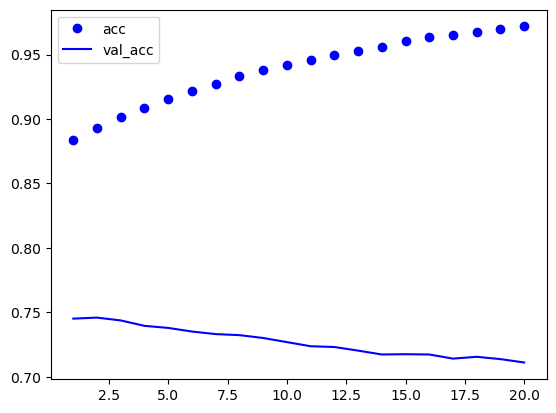

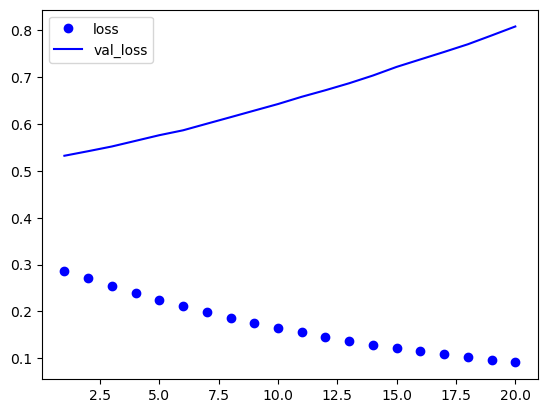

In [16]:
import matplotlib.pyplot as plt

acc=history.history['acc']
val_acc=history.history['val_acc']
loss=history.history['loss']
val_loss=history.history['val_loss']

epochs=range(1,len(acc)+1)

plt.plot(epochs,acc,'bo',label='acc')
plt.plot(epochs,val_acc,'b',label='val_acc')
plt.legend()

plt.figure()
plt.plot(epochs,loss,'bo',label='loss')
plt.plot(epochs,val_loss,'b',label='val_loss')
plt.legend()


In [30]:
pred=model.predict([[23,    4, 1690,   15,   16,    4, 1355,    5,   28,    6,   52,154,  462,   33,   89,   78,  285,   16,  145,   95]])

1/1 [==============================] - 0s 71ms/step


In [31]:
pred[0]

array([0.06375805], dtype=float32)

In [32]:
# TF-IDF

In [33]:
from collections import defaultdict
import math
import operator
 

def loadDataSet():
    dataset = [ ['my', 'dog', 'has', 'flea', 'problems', 'help', 'please'],    
                   ['maybe', 'not', 'take', 'him', 'to', 'dog', 'park', 'stupid'],
                   ['my', 'dalmation', 'is', 'so', 'cute', 'I', 'love', 'him'],
                   ['stop', 'posting', 'stupid', 'worthless', 'garbage'],
                   ['mr', 'licks', 'ate', 'my', 'steak', 'how', 'to', 'stop', 'him'],
                   ['quit', 'buying', 'worthless', 'dog', 'food', 'stupid'] ]
    classVec = [0, 1, 0, 1, 0, 1]  
    return dataset, classVec
 

def feature_select(list_words):
    
    doc_frequency=defaultdict(int)
    for word_list in list_words:
        for i in word_list:
            doc_frequency[i]+=1
 
    
    word_tf={}  
    for i in doc_frequency:
        word_tf[i]=doc_frequency[i]/sum(doc_frequency.values())
 
    
    doc_num=len(list_words)
    word_idf={} 
    word_doc=defaultdict(int) 
    for i in doc_frequency:
        for j in list_words:
            if i in j:
                word_doc[i]+=1
    for i in doc_frequency:
        word_idf[i]=math.log(doc_num/(word_doc[i]+1))
 
    
    word_tf_idf={}
    for i in doc_frequency:
        word_tf_idf[i]=word_tf[i]*word_idf[i]
 
    
    dict_feature_select=sorted(word_tf_idf.items(),key=operator.itemgetter(1),reverse=True)
    return dict_feature_select
 
if __name__=='__main__':
    data_list,label_list=loadDataSet() 
    features=feature_select(data_list) 
    print(features)
    print(len(features))

[('to', 0.0322394037469742), ('stop', 0.0322394037469742), ('worthless', 0.0322394037469742), ('my', 0.028288263356383563), ('dog', 0.028288263356383563), ('him', 0.028288263356383563), ('stupid', 0.028288263356383563), ('has', 0.025549122992281622), ('flea', 0.025549122992281622), ('problems', 0.025549122992281622), ('help', 0.025549122992281622), ('please', 0.025549122992281622), ('maybe', 0.025549122992281622), ('not', 0.025549122992281622), ('take', 0.025549122992281622), ('park', 0.025549122992281622), ('dalmation', 0.025549122992281622), ('is', 0.025549122992281622), ('so', 0.025549122992281622), ('cute', 0.025549122992281622), ('I', 0.025549122992281622), ('love', 0.025549122992281622), ('posting', 0.025549122992281622), ('garbage', 0.025549122992281622), ('mr', 0.025549122992281622), ('licks', 0.025549122992281622), ('ate', 0.025549122992281622), ('steak', 0.025549122992281622), ('how', 0.025549122992281622), ('quit', 0.025549122992281622), ('buying', 0.025549122992281622), ('f

In [39]:
import pandas as pd

In [41]:
pd.DataFrame(features)

,0,1
0,to,0.032239
1,stop,0.032239
2,worthless,0.032239
3,my,0.028288
4,dog,0.028288
5,him,0.028288
6,stupid,0.028288
7,has,0.025549
8,flea,0.025549
9,problems,0.025549


In [42]:
from nltk.text import TextCollection
from nltk.tokenize import word_tokenize
 
sents=['this is sentence one','this is sentence two','this is sentence three']
sents=[word_tokenize(sent) for sent in sents]
print(sents)
corpus=TextCollection(sents)
print(corpus)
 
tf=corpus.tf('one',corpus)
print(tf)
 
idf=corpus.idf('one')
print(idf)
 
tf_idf=corpus.tf_idf('one',corpus)
print(tf_idf)

[['this', 'is', 'sentence', 'one'], ['this', 'is', 'sentence', 'two'], ['this', 'is', 'sentence', 'three']]
<Text: this is sentence one this is sentence two...>
0.08333333333333333
1.0986122886681098
0.0915510240556758


In [50]:
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.feature_extraction.text import TfidfTransformer
 
x_train = ['The main idea of TF-IDF is that algorithm is an important feature that can be separated from the corpus background']
x_test=['Original text marked ',' main idea']
 
vectorizer = CountVectorizer(max_features=10)

tf_idf_transformer = TfidfTransformer()

tf_idf = tf_idf_transformer.fit_transform(vectorizer.fit_transform(x_train))

x_train_weight = tf_idf.toarray()
 

tf_idf = tf_idf_transformer.transform(vectorizer.transform(x_test))
x_test_weight = tf_idf.toarray()
 
print('Output x_train text vector：')
print(x_train_weight)
print('Output x_test text vector：')
print(x_test_weight)

Output x_train text vector：
[[0.22941573 0.22941573 0.22941573 0.45883147 0.22941573 0.22941573
  0.22941573 0.22941573 0.45883147 0.45883147]]
Output x_test text vector：
[[0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
 [0. 0. 0. 0. 1. 0. 0. 0. 0. 0.]]


In [51]:

import jieba.analyse
 
text='Keywords are words that can express the content of the center of a document.Information retrieval and system collection for reader review. Keyword extraction is a branch of the field of text mining.Basic work of text mining research such as document comparison, abstract generation, document classification and clustering'
 
keywords=jieba.analyse.extract_tags(text, topK=8, withWeight=False, allowPOS=())
print(keywords)

['document', 'text', 'mining', 'Keywords', 'words', 'express', 'content', 'center']
